In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv('Concrete_Data_Yeh.csv')

In [7]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [11]:
X = df[['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age']]

In [13]:
y = df['csMPa']

In [14]:
from sklearn.cross_validation import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print(lm.intercept_)

15.185900624662807


In [20]:
X_train.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age'],
      dtype='object')

In [21]:
X.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age'],
      dtype='object')

In [22]:
cdf = pd.DataFrame(lm.coef_, X.columns,columns=['Coeff'])

In [23]:
cdf

,Coeff
cement,0.103757
slag,0.083877
flyash,0.067947
water,-0.171985
superplasticizer,0.295673
coarseaggregate,0.001450
fineaggregate,0.004989
age,0.124451


In [24]:
prediction = lm.predict(X_test)

In [25]:
prediction

array([12.50020992, 24.61927506, 33.45663285, 19.53986113, 53.66938888,
       53.2106245 , 46.21319558, 20.28498947, 48.37245413, 41.96900935,
       26.14407277, 28.68587351, 26.81440805, 74.99784612, 22.30564898,
       30.81396004, 20.80944298, 33.15521446, 21.84253098, 15.84336691,
       25.5757665 , 32.11361282, 41.27907049, 25.33258914, 52.60797674,
       31.94915424, 28.59841909, 22.78602923, 40.0980491 , 53.3107493 ,
       36.40520622, 76.25380464, 23.32978627, 55.67997626, 20.31163987,
       23.4229093 , 32.58635574, 49.7425996 , 28.33632773, 28.47545814,
       44.16701253, 38.69117831, 62.23070099, 54.53966396, 51.94786784,
       30.95117032, 41.81497398, 24.29212229, 43.61574991, 34.72454513,
       30.58019568, 33.23548491, 27.47343317, 42.65192111, 55.17416286,
       42.06335106, 24.39735794, 30.9919633 , 31.62548504, 21.84536244,
       19.19502513, 35.46745348, 30.48386155, 18.87601425, 21.28010414,
       31.98640423, 33.52005393, 35.47967908, 38.22871438, 30.48

In [26]:
y_test

605      6.47
572     13.09
920     29.07
921      9.74
74      29.00
100     49.20
333     66.42
55      14.64
497     44.03
459     55.02
956     23.52
256     31.64
445     36.56
56      41.93
194     12.45
287     35.57
722     17.24
267     45.08
659     29.23
593     11.48
728     31.74
28      37.43
902     56.61
246     30.23
991     38.22
320     28.68
534     19.20
624     27.53
844     53.52
379     67.57
        ...  
65      55.06
543     10.22
64      48.70
1021    31.88
400     67.87
1009    42.64
188     40.71
29      38.60
960     40.93
969     39.42
631     17.54
894     29.72
909     23.74
690     23.52
682     24.05
279     13.12
734     40.66
517     15.07
18      40.56
691      6.81
4       44.30
513     40.29
660     31.02
34      53.69
69      71.99
958     49.77
60      54.38
326     50.60
483     55.25
306     48.28
Name: csMPa, dtype: float64

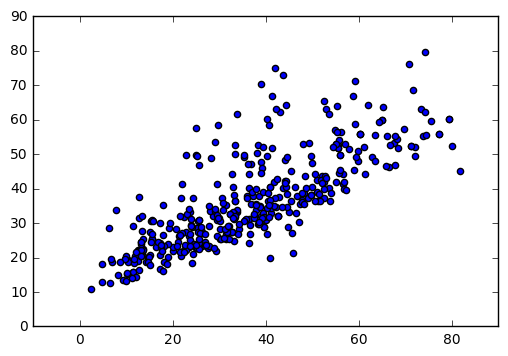

In [27]:
plt.scatter(y_test, prediction)

/Users/mdsobanjawaid/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: slice indices must be integers or None or have an __index__ method

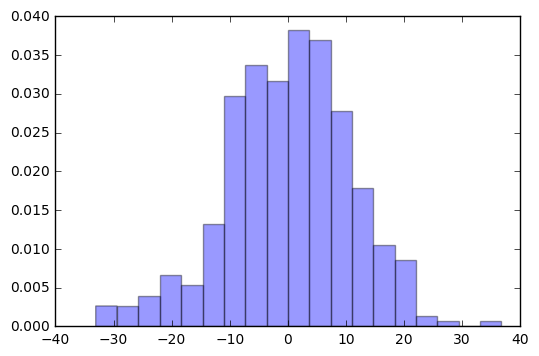

In [28]:
sns.distplot(y_test - prediction)

In [29]:
from sklearn import metrics

In [30]:
metrics.mean_absolute_error(y_test, prediction)

8.468672491275383

In [31]:
metrics.mean_squared_error(y_test, prediction)

115.88020484477909

In [32]:
np.sqrt(metrics.mean_squared_error(y_test, prediction))

10.764766827236858